# EDA: Indiana University Chest X-ray Dataset
Exploratory Data Analysis to understand label distribution, report structure, and image linkage.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud
from collections import Counter
import numpy as np


In [ ]:
# Dataset paths
report_path = '../data/chestxray_iu/indiana_reports.csv'
projection_path = '../data/chestxray_iu/indiana_projections.csv'
image_dir = '../data/chestxray_iu/images/images_normalized'

# Load datasets
reports_df = pd.read_csv(report_path)
projections_df = pd.read_csv(projection_path)

# Basic counts
print(f"🔢 Total report entries: {len(reports_df)}")
print(f"🖼️ Total image mappings (projections): {len(projections_df)}")
print(f"📄 Unique study IDs in reports: {reports_df['uid'].nunique()}")
print(f"📄 Unique study IDs in projections: {projections_df['uid'].nunique()}")
print(f"🖼️ Unique image filenames: {projections_df['filename'].nunique()}")

# Image file count (check actual image directory)
if os.path.exists(image_dir):
    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.dcm'))]
    print(f"📂 Total image files in folder: {len(image_files)}")
else:
    print(f"⚠️ Image folder not found at: {image_dir}")


🔢 Total report entries: 3851
🖼️ Total image mappings (projections): 7466
📄 Unique study IDs in reports: 3851
📄 Unique study IDs in projections: 3851
🖼️ Unique image filenames: 7466
📂 Total image files in folder: 7470


In [ ]:
# Data Summary Table

summary = {
    "Metric": [
        "Total report entries",
        "Total projection mappings",
        "Unique study IDs (reports)",
        "Unique study IDs (projections)",
        "Unique image filenames",
        "Total image files (actual folder)"
    ],
    "Count": [
        len(reports_df),
        len(projections_df),
        reports_df['uid'].nunique(),
        projections_df['uid'].nunique(),
        projections_df['filename'].nunique(),
        len(image_files) if os.path.exists(image_dir) else "Folder not found"
    ]
}

pd.DataFrame(summary)

,Metric,Count
0,Total report entries,3851
1,Total projection mappings,7466
2,Unique study IDs (reports),3851
3,Unique study IDs (projections),3851
4,Unique image filenames,7466
5,Total image files (actual folder),7470


In [20]:
# Basic info
print(reports_df.shape)
print(reports_df.columns)
reports_df.head()

(3851, 8)
Index(['uid', 'MeSH', 'Problems', 'image', 'indication', 'comparison',
       'findings', 'impression'],
      dtype='object')


,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [21]:
# Missing data
reports_df.isnull().sum()

uid              0
MeSH             0
Problems         0
image            0
indication      86
comparison    1166
findings       514
impression      31
dtype: int64

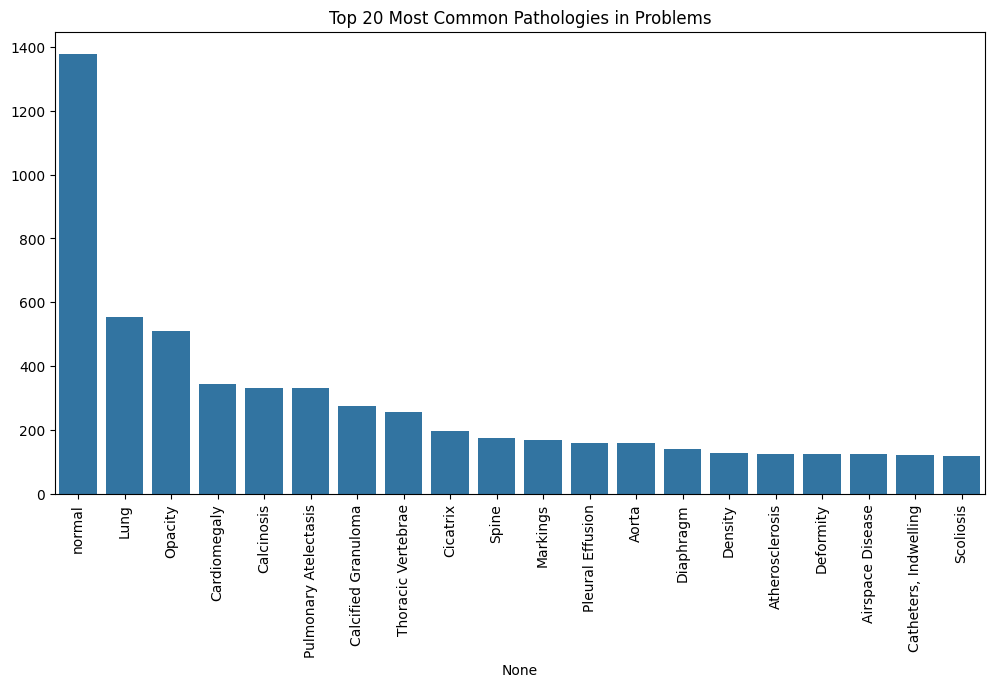

In [22]:
# Label distribution in 'Problems'
labels = reports_df['Problems'].dropna().str.split(';')
flat_labels = [label.strip() for sublist in labels for label in sublist]
label_counts = pd.Series(flat_labels).value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=label_counts.head(20).index, y=label_counts.head(20).values)
plt.xticks(rotation=90)
plt.title('Top 20 Most Common Pathologies in Problems')
plt.show()

In [23]:
# Report length analysis
reports_df['findings_len'] = reports_df['findings'].fillna('').apply(lambda x: len(x.split()))
reports_df['impression_len'] = reports_df['impression'].fillna('').apply(lambda x: len(x.split()))
reports_df[['findings_len', 'impression_len']].describe()

,findings_len,impression_len
count,3851.000000,3851.000000
mean,27.255258,10.477279
std,17.227146,11.927582
min,0.000000,0.000000
25%,18.000000,4.000000
50%,27.000000,5.000000
75%,36.000000,12.000000
max,169.000000,130.000000


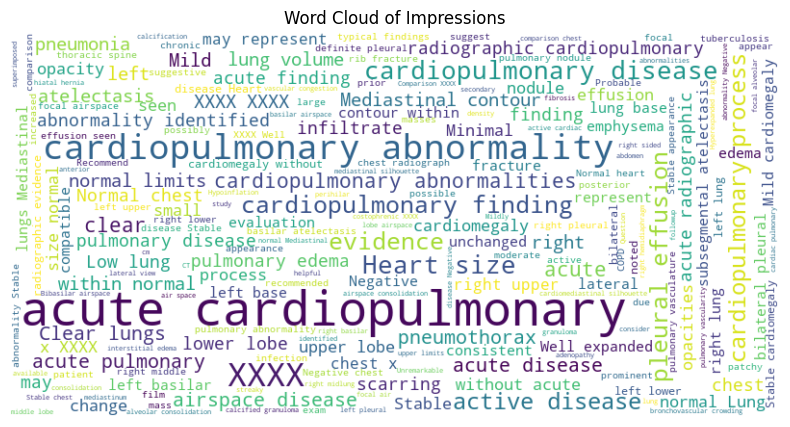

In [24]:
# Word cloud of impressions
text = ' '.join(reports_df['impression'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Impressions')
plt.show()

<Axes: title={'center': 'Projection Type Distribution'}, xlabel='projection'>

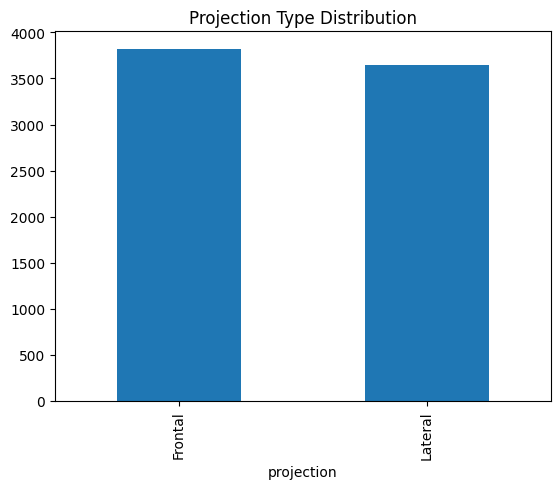

In [25]:
# Projection count
projections_df['projection'].value_counts().plot(kind='bar', title='Projection Type Distribution')

In [26]:
# Merge and show sample
merged_df = pd.merge(projections_df, reports_df, on='uid')
merged_df[['filename', 'projection', 'Problems', 'impression']].head()

,filename,projection,Problems,impression
0,1_IM-0001-4001.dcm.png,Frontal,normal,Normal chest x-XXXX.
1,1_IM-0001-3001.dcm.png,Lateral,normal,Normal chest x-XXXX.
2,2_IM-0652-1001.dcm.png,Frontal,Cardiomegaly;Pulmonary Artery,No acute pulmonary findings.
3,2_IM-0652-2001.dcm.png,Lateral,Cardiomegaly;Pulmonary Artery,No acute pulmonary findings.
4,3_IM-1384-1001.dcm.png,Frontal,normal,"No displaced rib fractures, pneumothorax, or p..."
